# TERM PAPER TEAM DVD TECH-2

##### AI usage: AI was used to get a structure for our loops and how to access the gender part in part 4 and 5. We also used it to generate codes for plots, which we later modified to suit our needs,Ai was also used to find bugs in our code and suggest possible alternatives.AI was used to understand tasks in greater detail especially part 2.2.3.

##### Candidate numbers: 
##### 1. 52
##### 2. 14
##### 3. 31

# PART 1 - reading in the data


In [85]:
#importing all the libraries needed for the tasks.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### TASK 1

In [86]:
#reading in the data 
DATA_PATH = 'data'
data = []
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
years = ['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
for year in years:
    for month in months:
        try:
            filename = f'{DATA_PATH}/SCE-{month}-{year}.csv'
            df = pd.read_csv(filename,sep=';')
            data.append(df)
        except FileNotFoundError:
            # Error handling since data is not present for all months in 2013
            continue

In [87]:
#merging all the dataframes in the data list into a single dataframe
df = pd.concat(data, ignore_index=True)

### TASK 2

In [88]:
# 2.1 number of unique individuals in the dataset
def num_unique_id():
    return len(df['userid'].unique())

print(f'Number of unique individuals in the dataset: {num_unique_id()}')

Number of unique individuals in the dataset: 23369


In [89]:
#2.2 number of rows in the dataset
def num_rows():
    return len(df)

print(f'Number of rows in the dataset: {num_rows()}')

Number of rows in the dataset: 176101


In [90]:
#2.3 number of unique survey waves
def unique_wid():
    return len(df['wid'].unique())

print(f'Number of unique survey waves: {unique_wid()}')

Number of unique survey waves: 139


In [91]:
#2.4 The first and last dates observed in the dataset.
first = df['date'].min()
print(f'First date observed in the dataset: {first}')
last = df['date'].max()
print(f'Last date observed in the dataset: {last}')

First date observed in the dataset: 2013-06-01
Last date observed in the dataset: 2024-12-31


# PART 2 - data pre-processing

### TASK 1

In [92]:
# Fill missing numeracy variables(num_lit_X_correct where X is a number)
num_cols = ['num_lit_q1_correct', 'num_lit_q2_correct', 'num_lit_q3_correct', 'num_lit_q5_correct', 'num_lit_q6_correct', 'num_lit_q8_correct', 'num_lit_q9_correct']

# Fill missing numeracy values with the first available non-missing value per user
# bfill() is used in case the first value is NaN, ensuring that a non-missing value is used to fill in columns backwards as well
for col in num_cols:
    df[col] = df.groupby('userid')[col].transform(lambda x: x.ffill().bfill())

### TASK 2

In [93]:
#2 drop all observationswith missing values
#1.for demographic variables(gender,age,education_level)
before = len(df)
df = df.dropna(subset=['female','age','educ'])
after_demographics = len(df)
print("Dropped demographics: ", before - after_demographics)

Dropped demographics:  868


In [94]:
#2.2  The three expectations questions about inflation, house price changes, and the stock market
#using the dropna function to drop rows with missing values in the specified columns
before = len(df)
df = df.dropna(subset=['inflation','house_price_change','prob_stocks_up'])
after_expectations = len(df)
print("Dropped expectations: ", before - after_expectations)

Dropped expectations:  1683


In [95]:
#2.3 The seven numeracy questions (after you have forward-filled nonmissing values in step 1!)
df = df.dropna(subset=num_cols)
after_numeracy = len(df)
print("Dropped demographics: ", after_expectations - after_numeracy)

Dropped demographics:  35974


### TASK 3

In [96]:
#3 Drop outliers (implausibly small or large values). For each expectations response:
expect_vars = ["inflation", "house_price_change", "prob_stocks_up"]
#creating a for loop to drop outliers for each variable in expect_vars
for var in expect_vars:
    low, high = df[var].quantile([0.001, 0.999])
    before = len(df)
    df = df[(df[var] >= low) & (df[var] <= high)]
    print(f"{var}: dropped {before - len(df)} outliers")

inflation: dropped 119 outliers
house_price_change: dropped 179 outliers
prob_stocks_up: dropped 0 outliers


### TASK 4

In [97]:
#Create a new column college equal to 1 if an individual has at least a bachelor’s degree, and 0
#otherwise.
df['college']=  (df["educ"] >= 4).astype(int)
df['college']

30936     1
30937     1
30942     1
30943     1
30944     1
         ..
176096    0
176097    1
176098    0
176099    0
176100    1
Name: college, Length: 137278, dtype: int64

### TASK 5

In [98]:
#total number of correct answers across the seven numeracy questions
df["num_correct"] = df[num_cols].sum(axis=1)
dist = df.groupby("num_correct")["userid"].nunique() / df["userid"].nunique()
print("\nDistribution of numeracy scores (% of individuals):")
print((dist * 100).round(1))

# median score
median_score = df["num_correct"].median()
df["num_lit_high"] = (df["num_correct"] > median_score).astype(int)


Distribution of numeracy scores (% of individuals):
num_correct
0.0     0.1
1.0     0.7
2.0     2.4
3.0     5.7
4.0    10.5
5.0    16.9
6.0    27.4
7.0    36.2
Name: userid, dtype: float64


### TASK 6

In [99]:
# Report the same sample statistics as in Part 1 for the final data set.
print(f'Number of unique individuals in the dataset: {num_unique_id()}')
print(f'Number of rows in the dataset: {num_rows()}')
print(f'Number of unique survey waves: {unique_wid()}')

Number of unique individuals in the dataset: 17701
Number of rows in the dataset: 137278
Number of unique survey waves: 117


# PART 3 Average expectations by group

### TASK 1 and TASK 2

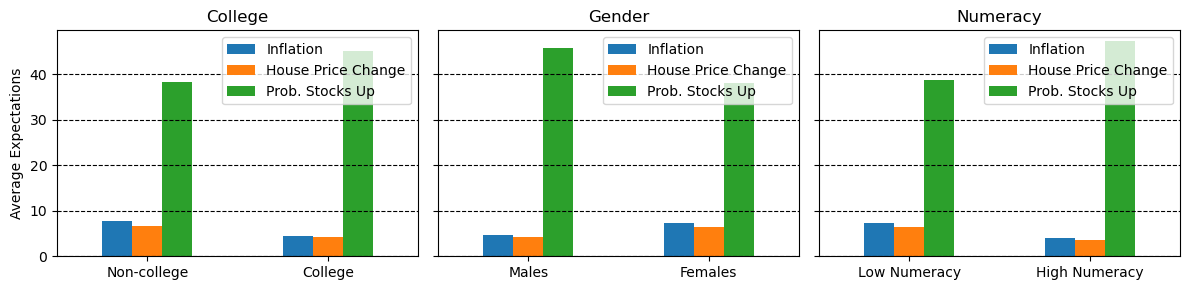

In [100]:
#Creating a list to analyze
groups = [
    ("college", {0: "Non-college", 1: "College"}, "College"),
    ("female", {0: "Males", 1: "Females"}, "Gender"),
    ("num_lit_high", {0: "Low Numeracy", 1: "High Numeracy"}, "Numeracy")
]

#Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

#Iterate through the list created and setting values for plotting
for ax, (column, mapping, title) in zip(axes, groups):
    group_means = df.groupby(column)[["inflation", "house_price_change", "prob_stocks_up"]].mean().reset_index()
    group_means[column] = group_means[column].map(mapping)

    Plotting_Values = group_means.set_index(column)

    #Plotting the graph 
    Plotting_Values.plot(kind = 'bar', ax= ax, legend = False)
    ax.set_title(title)
    ax.set_ylabel("Average Expectations")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
    ax.set_xlabel("")
    ax.grid(True, axis="y", linestyle="--", alpha=1, color = 'black')
    ax.legend(["Inflation", "House Price Change", "Prob. Stocks Up"], loc='upper right')

fig.tight_layout()

# PART 4 Expectation dynamics by group

### TASK 1

In [101]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# Restrict to 2015–2024
df_range = df[(df['date'].dt.year >= 2015) & (df['date'].dt.year <= 2024)]


### TASK 2 and TASK 3

In [102]:
#defining a function to create data frames for each group
def create_data_frame_for_group(col, mapping, title):
    # Monthly averages by group
    monthly_avg = (
        df_range.groupby([pd.Grouper(key="date", freq="ME"), col])
        [["inflation", "house_price_change", "prob_stocks_up"]]
        .mean()
        .reset_index()
    )
    monthly_avg[col] = monthly_avg[col].map(mapping)
    return monthly_avg

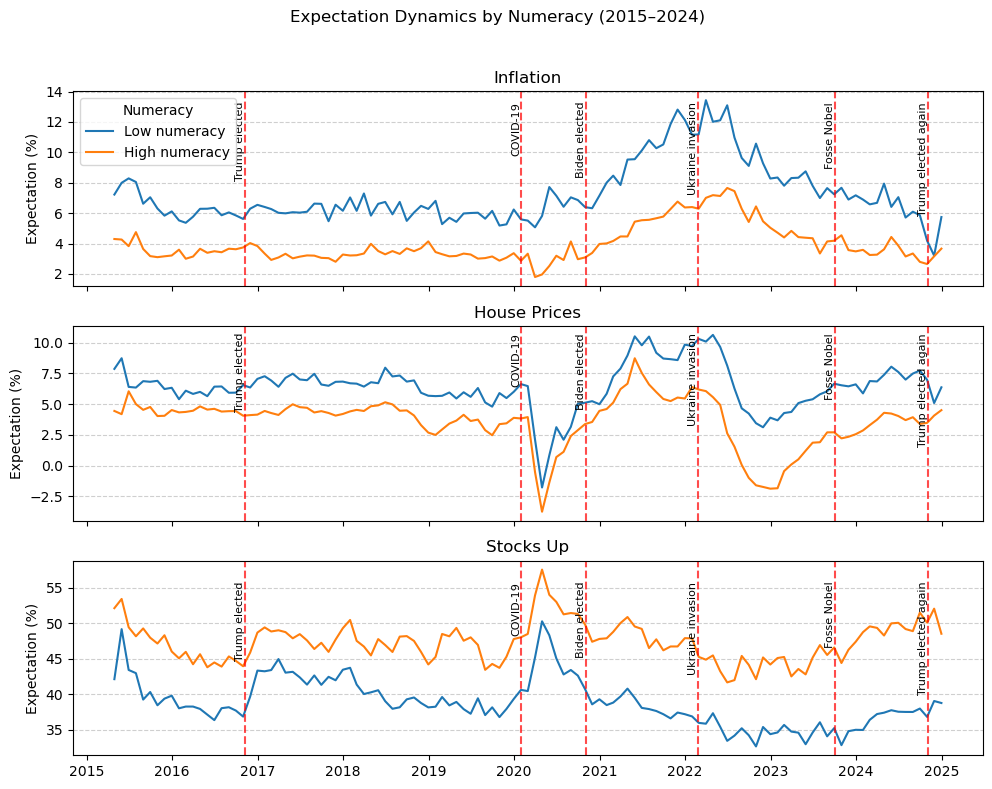

In [103]:
#using the groups made in part 3.
groups = [
    ("female", {0: "Males", 1: "Females"}, "Gender"),
    ("college", {0: "Non-college", 1: "College"}, "Education"),
    ("num_lit_high", {0: "Low numeracy", 1: "High numeracy"}, "Numeracy")
]
#creating a for loop to create data frames for each group and plotting the graphs
for col, mapping, title in groups:
    monthly = create_data_frame_for_group(col, mapping, title)

fig, axes = plt.subplots(3, 1, figsize =(10, 8), sharex=True)

vars_ = ["inflation", "house_price_change", "prob_stocks_up"]
labels = ["Inflation", "House Prices", "Stocks Up"]

events = [
    ("2016-11-08", "Trump elected"),
    ("2020-02-01", "COVID-19"),
    ("2020-11-03", "Biden elected"),
    ("2022-02-24", "Ukraine invasion"),
    ("2023-10-03", "Fosse Nobel"),
    ("2024-11-05", "Trump elected again")
]

for ax, var, label in zip(axes, vars_, labels):
        for g in monthly[col].unique():
            subset = monthly[monthly[col] == g]
            ax.plot(subset["date"], subset[var], label=g)
        ax.set_title(label)
        ax.set_ylabel("Expectation (%)")
        ax.grid(True, axis="y", linestyle="--", alpha=0.6)

        # Add event markers
        for d, txt in events:
            ax.axvline(pd.to_datetime(d), color="red", linestyle="--", alpha=0.7)
            ax.text(pd.to_datetime(d), ax.get_ylim()[1]*0.95, txt,
                    rotation=90, va="top", ha="right", fontsize=8)

axes[0].legend(title=title)
plt.suptitle(f"Expectation Dynamics by {title} (2015–2024)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# PART 5 Correlations with past and future realizations

#### Explanation

In [104]:
# Reading in the CPI data
filename = f'{DATA_PATH}/CPI.csv'
cpi_df = pd.read_csv(filename)

### TASK 1

In [105]:
#5.1.1 Inflation
#defining a function to compute looking inflation for n months ahead or behind
def compute_looking_inflation(column_name, n):
    cpi_df[column_name] = (cpi_df['CPI'].shift(n) / cpi_df['CPI'] - 1) * 100
    return cpi_df

forward_cpi = compute_looking_inflation('realized_inflation_12m', n = -12)
#showing the first five rows of the dataframe created
forward_cpi.head()

,DATE,CPI,realized_inflation_12m
0,1947-01-01,21.5,10.232558
1,1947-02-01,21.6,9.722222
2,1947-03-01,22.0,6.818182
3,1947-04-01,22.0,8.181818
4,1947-05-01,22.0,9.090909


In [106]:
#5.1.2 Merge this inflation measure with the monthly averages by gender based on 
# the average expected inflation by gender i in month t from the SCE.

#Changing the name of the column to lowercase so that we can merge the columns
cpi_df = cpi_df.rename(columns={'DATE': 'date'})

# Function that merges the columns
def merge_with_CPI(cpi_df, cpi_columns, monthly_avg_df, columns):
    #Make sure that the data types are the same
    monthly_avg_df['date'] = pd.to_datetime(monthly_avg_df['date'])
    cpi_df['date'] = pd.to_datetime(cpi_df['date'])
    
    #Convert to month periods since cpi has dates with the first day (1st) of the month
    #while our monthly df has dates with the last day (30th or 31st) of the month
    monthly_avg_df['month'] = monthly_avg_df['date'].dt.to_period('M')
    cpi_df['month'] = cpi_df['date'].dt.to_period('M')
    
    # Merge: keep all rows from sce_df, match on month
    monthly_cpi_df = pd.merge(
        monthly_avg_df[columns],
        cpi_df[cpi_columns],
        on='month',
        how='inner'   # <-- only months from SCE data are kept
    )
    return monthly_cpi_df

In [107]:
# Merging CPI with monthly averaged by gender from part 4.
gender_monthly_avg = create_data_frame_for_group('female', {0: 'Males', 1: 'Females'}, 'Gender')

gender_monthly_forward_cpi_df = merge_with_CPI(cpi_df, ['month','CPI', 'realized_inflation_12m'] ,gender_monthly_avg, ['month', 'house_price_change', 'prob_stocks_up','female','inflation'])
gender_monthly_forward_cpi_df.head()

,month,house_price_change,prob_stocks_up,female,inflation,CPI,realized_inflation_12m
0,2015-04,4.595238,46.976190,Males,5.652381,236.2,1.185436
1,2015-04,9.013889,44.291667,Females,6.780556,236.2,1.185436
2,2015-05,6.160448,52.283582,Males,6.348507,237.0,1.097046
3,2015-05,7.808333,49.275000,Females,6.725000,237.0,1.097046
4,2015-06,4.456186,48.654639,Males,5.082990,237.7,1.051746


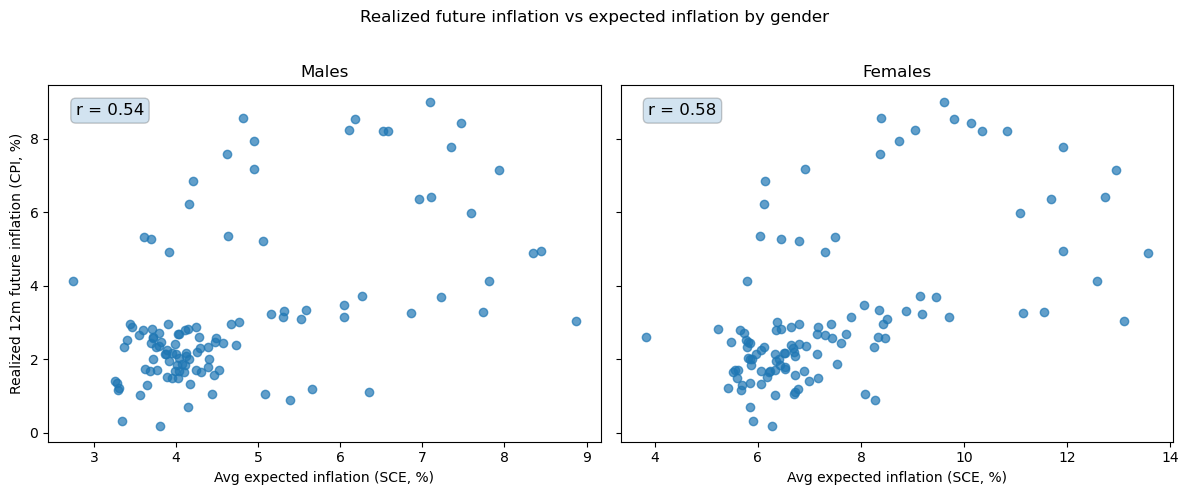

In [108]:
#5.1.3 Creating a scatter plot

# Scatter: realized future inflation vs avg expected inflation by gender

def create_scatter_plot(gender_monthly_cpi_df, inflation_looking_type, inflation_title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    genders = ['Males', 'Females']
    
    for ax, g in zip(axes, genders):
        sub = gender_monthly_cpi_df[gender_monthly_cpi_df['female'] == g].dropna(subset=['inflation', inflation_looking_type])
        ax.scatter(sub['inflation'], sub[inflation_looking_type], alpha=0.7)
        # correlation
        if len(sub) >= 2:
            r = sub['inflation'].corr(sub[inflation_looking_type])
            corr_text = f"r = {r:.2f}"
        else:
            corr_text = "r = n/a"
        ax.text(0.05, 0.95, corr_text, transform=ax.transAxes, va='top', ha='left',
                fontsize=12, bbox=dict(boxstyle='round', alpha=0.2))
        ax.set_title(g)
        ax.set_xlabel("Avg expected inflation (SCE, %)")
    axes[0].set_ylabel(f"Realized 12m { inflation_title } inflation (CPI, %)")
    plt.suptitle(f"Realized {inflation_title} inflation vs expected inflation by gender")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

create_scatter_plot(gender_monthly_forward_cpi_df, 'realized_inflation_12m', 'future')

### TASK 2

In [109]:
#5.2.1 and 5.2.2 reused code as functions from 5.1.1 and 5.1.2 to compute past inflation and merge with monthly averages by gender
backwards_cpi_df = compute_looking_inflation('realized_inflation_past_12m', n = 12)

gender_monthly_avg = create_data_frame_for_group('female', {0: 'Males', 1: 'Females'}, 'Gender')

gender_monthly_backwards_cpi_df = merge_with_CPI(backwards_cpi_df, ['month','CPI', 'realized_inflation_past_12m'], gender_monthly_avg, ['month', 'house_price_change', 'prob_stocks_up','female','inflation'])
gender_monthly_backwards_cpi_df.head()

,month,house_price_change,prob_stocks_up,female,inflation,CPI,realized_inflation_past_12m
0,2015-04,4.595238,46.976190,Males,5.652381,236.2,0.127011
1,2015-04,9.013889,44.291667,Females,6.780556,236.2,0.127011
2,2015-05,6.160448,52.283582,Males,6.348507,237.0,-0.042194
3,2015-05,7.808333,49.275000,Females,6.725000,237.0,-0.042194
4,2015-06,4.456186,48.654639,Males,5.082990,237.7,-0.210349


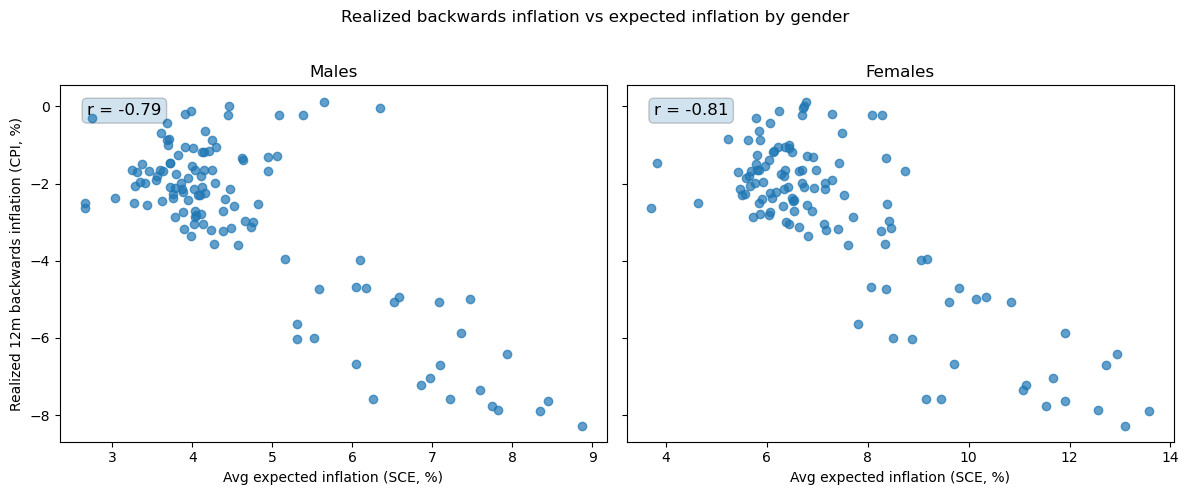

In [110]:
#5.2.3:Generate the scatterplot and reusing function from part 5.1.3
create_scatter_plot(gender_monthly_backwards_cpi_df, 'realized_inflation_past_12m', 'backwards')

#### Differences: the  absolute regression value or the r value is higher in the backward 12 months, that imples that the numbers are more accurate compared to the future values. The female predictions were more accurate than the male in both cases.The difference of observations from the two genders is not that notable, with a 0.04 difference in the future inflation predictions and a 0.02 difference in the past inflation predictions.